In [9]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
# data is the output from initialisation of the mom solo experiment
# initial temp is 15C
data = r'./output000/output000'
#indata = r'/Data/MOM_Gyre/input/mom_ra'

data = r'./output000/output000'
data = r'./output205'

In [22]:
ocean = xr.open_dataset(os.path.join(data, 'ocean_heat.nc'), decode_times=False)
osnap = xr.open_dataset(os.path.join(data, 'ocean_snap.nc'), decode_times=False)
ogrid = xr.open_dataset(os.path.join(data, 'ocean_grid.nc'), decode_times=False)
#ora = xr.open_dataset(os.path.join(data, 'output000', 'ocean_risavg.nc'), decode_times=False)
#oscalar = xr.open_dataset(os.path.join(data, 'output000', 'ocean_scalar.nc'), decode_times=False)
#sst_data = xr.open_dataset(os.path.join(indata, 'temp_sfc_restore.nc'), decode_times=False)

In [23]:
rho0 = 1035. # kgm-3
Cp = 3992.10322329649 # J kg-1 degC-1
dt = ocean.average_DT*(60*60*24) # time difference between consecutive steps in seconds

1112.6795790848357
1128.5023913036684


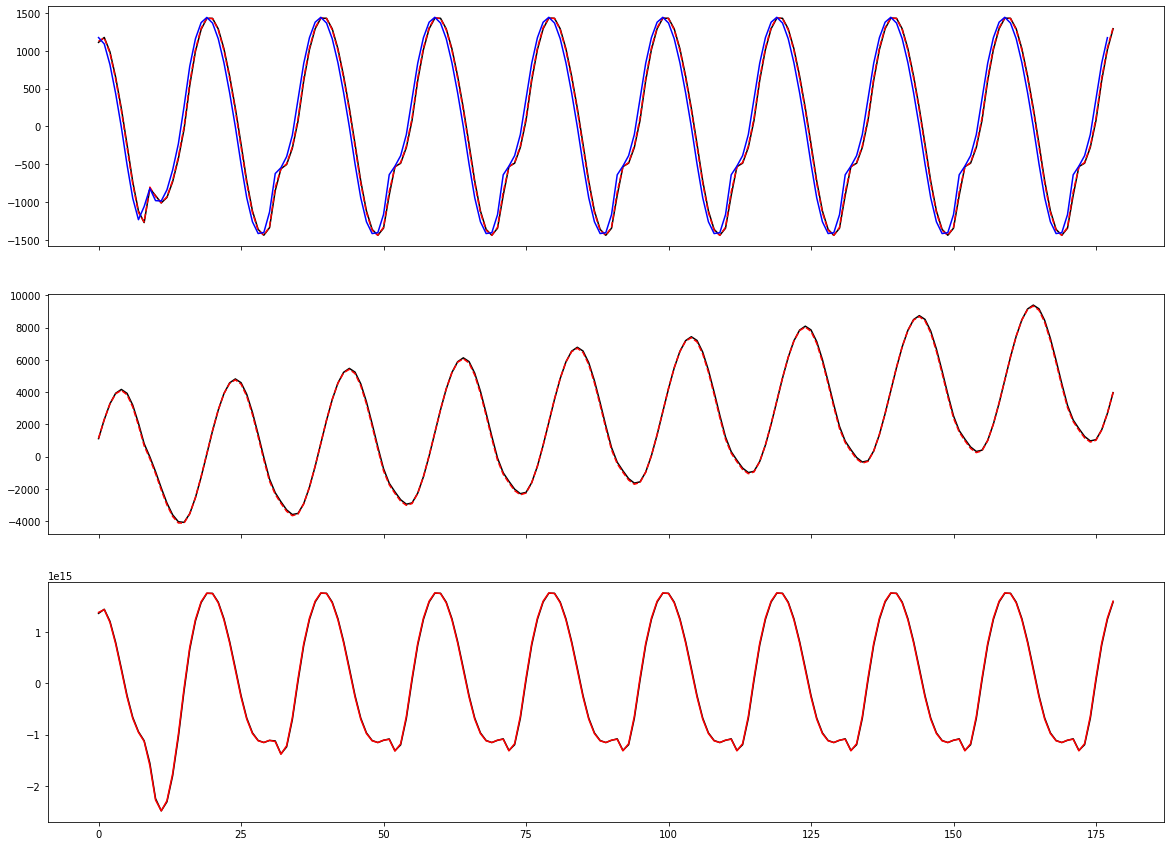

In [44]:
# Simple example
data = r'./output000/output000'
ocean = xr.open_dataset(os.path.join(data, 'ocean.nc'), decode_times=False)
osnap = xr.open_dataset(os.path.join(data, 'ocean_snap.nc'), decode_times=False)
ogrid = xr.open_dataset(os.path.join(data, 'ocean.nc'), decode_times=False)
rho0 = 1035. # kgm-3
Cp = 3992.10322329649 # J kg-1 degC-1
dt = ocean.average_DT*(60*60*24) # time difference between consecutive steps in seconds

H = Cp*rho0*osnap.temp*osnap.dzt
Havg = Cp*rho0*ocean.temp*ocean.dzt
T = ocean.temp_tendency
A = ogrid.area_t

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,sharex=True,figsize=(20,15))

xi,yi,zi = 1,1,0

dHdt = (H[1:,zi,yi,xi].values-H[:-1,zi,yi,xi].values)/dt[1:].values
dHavgdt = (Havg[1:,zi,yi,xi].values-Havg[:-1,zi,yi,xi].values)/dt[1:].values

ax1.plot(dHdt,'-k')
ax1.plot(T[1:,zi,yi,xi],'--r')
ax1.plot(dHavgdt[1:],'-b')

ax2.plot(np.cumsum(dHdt),'-k')
ax2.plot(np.cumsum(T[1:,zi,yi,xi]),'--r')

print((H[1,zi,yi,xi].values-H[0,zi,yi,xi].values)/dt[1].values)
print(T[1,zi,yi,xi].values)

# Global integral:
Ht = (H.sum('st_ocean')*A).sum('xt_ocean').sum('yt_ocean')
Tt = (T.sum('st_ocean')*A).sum('xt_ocean').sum('yt_ocean')

dHdt = (Ht[1:].values-Ht[:-1].values)/dt[1:].values
ax3.plot(dHdt,'-k')
ax3.plot(Tt[1:],'-r')

0.1030554239660698
0.11657516900309568


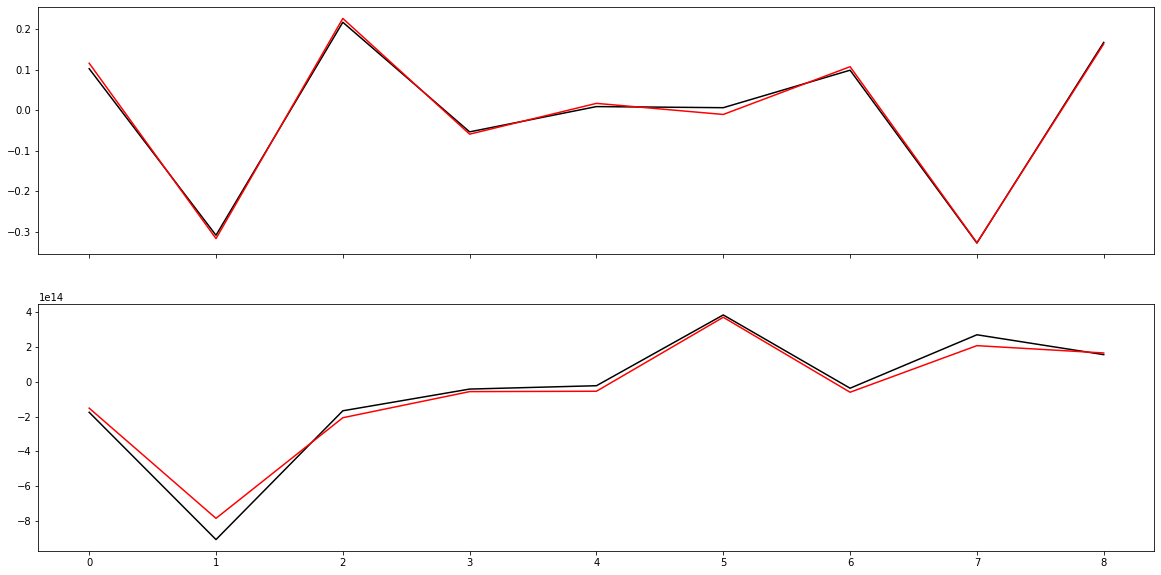

In [39]:
# ACCESS-OM2
data = r'./output205'
ocean = xr.open_dataset(os.path.join(data, 'ocean_heat.nc'), decode_times=False)
osnap = xr.open_dataset(os.path.join(data, 'ocean_snap.nc'), decode_times=False)
ogrid = xr.open_dataset(os.path.join(data, 'ocean_grid.nc'), decode_times=False)
rho0 = 1035. # kgm-3
Cp = 3992.10322329649 # J kg-1 degC-1
dt = ocean.average_DT*(60*60*24) # time difference between consecutive steps in seconds

H = Cp*rho0*osnap.temp*osnap.dzt
T = ocean.temp_tendency
A = ogrid.area_t

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(20,10))

xi,yi,zi = 100,100,0

dHdt = (H[1:,zi,yi,xi].values-H[:-1,zi,yi,xi].values)/dt[1:].values

ax1.plot(dHdt,'-k')
ax1.plot(T[1:,zi,yi,xi],'-r')

print((H[1,zi,yi,xi].values-H[0,zi,yi,xi].values)/dt[1].values)
print(T[1,zi,yi,xi].values)

# Global integral:
Ht = (H.sum('st_ocean')*A).sum('xt_ocean').sum('yt_ocean')
Tt = (T.sum('st_ocean')*A).sum('xt_ocean').sum('yt_ocean')

dHdt = (Ht[1:].values-Ht[:-1].values)/dt[1:].values
ax2.plot(dHdt,'-k')
ax2.plot(Tt[1:],'-r')